# Data Wrangling

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
data = pd.read_csv(r'C:\Users\PachecoM\OneDrive - HP Inc\personal\Proyectos personales\Data science\MACHINE LEARNING UDEMY\python-ml-course-master\datasets\customer-churn-model\Customer Churn Model.txt', sep=",")
data.head()

,State,Account Length,Area Code,Phone,Int'l Plan,VMail Plan,VMail Message,Day Mins,Day Calls,Day Charge,...,Eve Calls,Eve Charge,Night Mins,Night Calls,Night Charge,Intl Mins,Intl Calls,Intl Charge,CustServ Calls,Churn?
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False.
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False.
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False.
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False.
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False.


### Crear un subconjunto de datos

In [7]:
account_length = data["Account Length"]
account_length.head()

0    128
1    107
2    137
3     84
4     75
Name: Account Length, dtype: int64

la extracción anterior, si bien ha extraido los datos de la columna en cuenstion, aun no pueden ser tratados como un data set. Al utilizar el método type() nos daremos cuenta que es de tipo "Series".

In [8]:
sub_set=data[["Account Length", "Phone", "Eve Charge", "Day Calls"]]
sub_set.head()

,Account Length,Phone,Eve Charge,Day Calls
0,128,382-4657,16.78,110
1,107,371-7191,16.62,123
2,137,358-1921,10.30,114
3,84,375-9999,5.26,71
4,75,330-6626,12.61,113


In [9]:
type(sub_set)

pandas.core.frame.DataFrame

En este caso, al seleccionar varias columnas, el resultado si será un objeto tipo dataframe

Tambien se puede especificar las columnas deseadas a través de una lista

In [10]:
columnas_deseadas = ["Account Length", "Phone", "Eve Charge", "Day Calls"]
sub_set = data[columnas_deseadas]
sub_set.head(10)

,Account Length,Phone,Eve Charge,Day Calls
0,128,382-4657,16.78,110
1,107,371-7191,16.62,123
2,137,358-1921,10.30,114
3,84,375-9999,5.26,71
4,75,330-6626,12.61,113
5,118,391-8027,18.75,98
6,121,355-9993,29.62,88
7,147,329-9001,8.76,79
8,117,335-4719,29.89,97
9,141,330-8173,18.87,84


In [11]:
columnas_deseadas = ["Account Length", "VMail Message", "Day Calls"]
todas_las_columnas = data.columns.values.tolist()
todas_las_columnas

['State',
 'Account Length',
 'Area Code',
 'Phone',
 "Int'l Plan",
 'VMail Plan',
 'VMail Message',
 'Day Mins',
 'Day Calls',
 'Day Charge',
 'Eve Mins',
 'Eve Calls',
 'Eve Charge',
 'Night Mins',
 'Night Calls',
 'Night Charge',
 'Intl Mins',
 'Intl Calls',
 'Intl Charge',
 'CustServ Calls',
 'Churn?']

In [12]:
sub_lista = [x for x in todas_las_columnas if x not in columnas_deseadas]
sub_lista

['State',
 'Area Code',
 'Phone',
 "Int'l Plan",
 'VMail Plan',
 'Day Mins',
 'Day Charge',
 'Eve Mins',
 'Eve Calls',
 'Eve Charge',
 'Night Mins',
 'Night Calls',
 'Night Charge',
 'Intl Mins',
 'Intl Calls',
 'Intl Charge',
 'CustServ Calls',
 'Churn?']

In [13]:
sub_set = data[sub_lista]
sub_set.head(10)

,State,Area Code,Phone,Int'l Plan,VMail Plan,Day Mins,Day Charge,Eve Mins,Eve Calls,Eve Charge,Night Mins,Night Calls,Night Charge,Intl Mins,Intl Calls,Intl Charge,CustServ Calls,Churn?
0,KS,415,382-4657,no,yes,265.1,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False.
1,OH,415,371-7191,no,yes,161.6,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False.
2,NJ,415,358-1921,no,no,243.4,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False.
3,OH,408,375-9999,yes,no,299.4,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False.
4,OK,415,330-6626,yes,no,166.7,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False.
5,AL,510,391-8027,yes,no,223.4,37.98,220.6,101,18.75,203.9,118,9.18,6.3,6,1.70,0,False.
6,MA,510,355-9993,no,yes,218.2,37.09,348.5,108,29.62,212.6,118,9.57,7.5,7,2.03,3,False.
7,MO,415,329-9001,yes,no,157.0,26.69,103.1,94,8.76,211.8,96,9.53,7.1,6,1.92,0,False.
8,LA,408,335-4719,no,no,184.5,31.37,351.6,80,29.89,215.8,90,9.71,8.7,4,2.35,1,False.
9,WV,415,330-8173,yes,yes,258.6,43.96,222.0,111,18.87,326.4,97,14.69,11.2,5,3.02,0,False.


### Subconjuntos de filas con ciertas condiciones

In [14]:
data[1:25]

,State,Account Length,Area Code,Phone,Int'l Plan,VMail Plan,VMail Message,Day Mins,Day Calls,Day Charge,...,Eve Calls,Eve Charge,Night Mins,Night Calls,Night Charge,Intl Mins,Intl Calls,Intl Charge,CustServ Calls,Churn?
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False.
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False.
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False.
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False.
5,AL,118,510,391-8027,yes,no,0,223.4,98,37.98,...,101,18.75,203.9,118,9.18,6.3,6,1.70,0,False.
6,MA,121,510,355-9993,no,yes,24,218.2,88,37.09,...,108,29.62,212.6,118,9.57,7.5,7,2.03,3,False.
7,MO,147,415,329-9001,yes,no,0,157.0,79,26.69,...,94,8.76,211.8,96,9.53,7.1,6,1.92,0,False.
8,LA,117,408,335-4719,no,no,0,184.5,97,31.37,...,80,29.89,215.8,90,9.71,8.7,4,2.35,1,False.
9,WV,141,415,330-8173,yes,yes,37,258.6,84,43.96,...,111,18.87,326.4,97,14.69,11.2,5,3.02,0,False.
10,IN,65,415,329-6603,no,no,0,129.1,137,21.95,...,83,19.42,208.8,111,9.40,12.7,6,3.43,4,True.


Adicional al metodo de segmentación con dos puntos visto en el chunk anterios, se puede especificar una condición buleana, para que se filtren las filas que satisfacen dicha condición:

* Filtrat usuarios con "Day Mins" > 200

In [20]:
data1 = data[data["Day Mins"]>200]
data1.head(10)

,State,Account Length,Area Code,Phone,Int'l Plan,VMail Plan,VMail Message,Day Mins,Day Calls,Day Charge,...,Eve Calls,Eve Charge,Night Mins,Night Calls,Night Charge,Intl Mins,Intl Calls,Intl Charge,CustServ Calls,Churn?
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False.
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False.
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False.
5,AL,118,510,391-8027,yes,no,0,223.4,98,37.98,...,101,18.75,203.9,118,9.18,6.3,6,1.70,0,False.
6,MA,121,510,355-9993,no,yes,24,218.2,88,37.09,...,108,29.62,212.6,118,9.57,7.5,7,2.03,3,False.
9,WV,141,415,330-8173,yes,yes,37,258.6,84,43.96,...,111,18.87,326.4,97,14.69,11.2,5,3.02,0,False.
15,NY,161,415,351-7269,no,no,0,332.9,67,56.59,...,97,27.01,160.6,128,7.23,5.4,9,1.46,4,True.
19,TX,73,415,373-2782,no,no,0,224.4,90,38.15,...,88,13.56,192.8,74,8.68,13.0,2,3.51,1,False.
26,WY,57,408,357-3817,no,yes,39,213.0,115,36.21,...,112,16.24,182.7,115,8.22,9.5,3,2.57,0,False.
31,NH,75,510,370-3359,no,no,0,226.1,105,38.44,...,107,17.13,246.2,98,11.08,10.3,5,2.78,1,False.


Ahora filtraremos "State"="NY"

In [22]:
data2 = data[data["State"]=="NY"]
data2.head()
data2.shape

(83, 21)

Para dos condiciones and -> & y or -> |

In [23]:
data3 = data[(data["Day Mins"]>300) & (data["State"]=="NY")]
data3

,State,Account Length,Area Code,Phone,Int'l Plan,VMail Plan,VMail Message,Day Mins,Day Calls,Day Charge,...,Eve Calls,Eve Charge,Night Mins,Night Calls,Night Charge,Intl Mins,Intl Calls,Intl Charge,CustServ Calls,Churn?
15,NY,161,415,351-7269,no,no,0,332.9,67,56.59,...,97,27.01,160.6,128,7.23,5.4,9,1.46,4,True.
985,NY,64,415,345-9140,yes,no,0,346.8,55,58.96,...,79,21.21,275.4,102,12.39,13.3,9,3.59,1,True.


In [24]:
data4 = data[(data["Day Mins"]>300) | (data["State"]=="NY")]
data4.shape

(124, 21)

### Subconjuntos con .loc e .iloc y creación de nuevas columnas

Para ilustrar la creación de subconjuntos, filtrando tanto filas como columnas a la vez, utilizaremos el siguiente ejemplo basados en el dataframe original:

* Seleccionar las columnas "Day Mins", "Night Mins" y "Account Lenght" de los primeros 50 individuos

In [27]:
sub_set2= data[["Day Mins","Night Mins","Account Length"]][:50]
sub_set2.shape
sub_set2.head()

,Day Mins,Night Mins,Account Length
0,265.1,244.7,128
1,161.6,254.4,107
2,243.4,162.6,137
3,299.4,196.9,84
4,166.7,186.9,75


el primer juego de llaves [ ] filtrará las condiciones de columnas, y el segundo juego de llaves hará lo respectivo con las condiciones de fila

In [31]:
data.iloc[1:10,3:6]

,Phone,Int'l Plan,VMail Plan
1,371-7191,no,yes
2,358-1921,no,no
3,375-9999,yes,no
4,330-6626,yes,no
5,391-8027,yes,no
6,355-9993,no,yes
7,329-9001,yes,no
8,335-4719,no,no
9,330-8173,yes,yes


El método iloc[] permite realizar el filtrado por filas y columnas(en ese orden) con una sintaxis más simple.

In [ ]:
data.iloc[:,3:6] ## Todas las filas para las columnas de la 3 a la 6
data.iloc[1:10,:] ## Todas las columnas de las filas 1 a la 10

In [33]:
data.iloc[1:10,[2, 5, 7]] ## filas del 1 al 10, para las columnas especificadas en un array

,Area Code,VMail Plan,Day Mins
1,415,yes,161.6
2,415,no,243.4
3,408,no,299.4
4,415,no,166.7
5,510,no,223.4
6,510,yes,218.2
7,415,no,157.0
8,408,no,184.5
9,415,yes,258.6


In [36]:
data.loc[1:10,["Area Code", "VMail Plan", "Day Mins"]] ## filas del 1 al 10, para las columnas el método .loc usa las etiquedas de las culumnas

,Area Code,VMail Plan,Day Mins
1,415,yes,161.6
2,415,no,243.4
3,408,no,299.4
4,415,no,166.7
5,510,no,223.4
6,510,yes,218.2
7,415,no,157.0
8,408,no,184.5
9,415,yes,258.6
10,415,no,129.1


Ahora, vamos a **crear** una nueva columna a partir de datos del dataset.

In [37]:
data["Total Mins"] = data["Day Mins"] + data["Night Mins"] + data["Eve Mins"]
data["Total Mins"].head()

0    707.2
1    611.5
2    527.2
3    558.2
4    501.9
Name: Total Mins, dtype: float64

In [38]:
data["Total Calls"] = data["Day Calls"] + data["Night Calls"] + data["Eve Calls"]
data["Total Calls"].head()

0    300
1    329
2    328
3    248
4    356
Name: Total Calls, dtype: int64

In [39]:
data.head()

,State,Account Length,Area Code,Phone,Int'l Plan,VMail Plan,VMail Message,Day Mins,Day Calls,Day Charge,...,Night Mins,Night Calls,Night Charge,Intl Mins,Intl Calls,Intl Charge,CustServ Calls,Churn?,Total Mins,Total Calls
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,244.7,91,11.01,10.0,3,2.70,1,False.,707.2,300
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,254.4,103,11.45,13.7,3,3.70,1,False.,611.5,329
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,162.6,104,7.32,12.2,5,3.29,0,False.,527.2,328
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,196.9,89,8.86,6.6,7,1.78,2,False.,558.2,248
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,186.9,121,8.41,10.1,3,2.73,3,False.,501.9,356


### Generación de números aleatorios

Se debe presuponer que, cada vez que se hace un llamado (ejecuta) a la función que guarda numeros aleatorios, estos van a cambias. Para evitar este cambio, debe usarse una "Semilla".

In [45]:
np.random.randint(1,100) ## Aleatorios enteros entre 1 y 100

81

In [47]:
np.random.random() ## números aleatorios entre 0 y 1

0.1161427966515961

Vamos a crear una función que genere números aleatorios enteros dentro del intervalo [A,B]

In [52]:
def Lista_aleatorios(n,a,b):
    x = []
    for i in range(n):
        x.append(np.random.randint(a,b))
    return x

In [53]:
Lista_aleatorios(25, 1, 50)

[39,
 3,
 5,
 18,
 14,
 7,
 33,
 39,
 2,
 22,
 21,
 21,
 6,
 26,
 3,
 13,
 5,
 18,
 1,
 1,
 42,
 37,
 3,
 22,
 27]

Sin embargo, hay un método definido en el paquete random, que permite generar números aleatorios en un rango específico.

In [54]:
import random

In [56]:
random.randrange(0,100,7)

70

In [57]:
for i in range(10):
    print(random.randrange(0, 100, 7))

98
63
7
56
0
91
77
77
28
56


### Método shuffle

In [59]:
a = np.arange(100)
a

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
       51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
       68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84,
       85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99])

In [61]:
np.random.shuffle(a)
a

array([50, 46, 74, 29, 23, 91, 56, 69, 81,  8, 22, 77, 15, 40, 55, 36, 95,
       78, 52, 33, 92,  0, 58, 30, 66, 68, 41, 89, 64, 12, 18,  2, 24, 48,
       39, 14, 37, 57, 96,  3, 82, 87, 19, 85, 42, 20, 47, 71, 11, 99, 43,
       38, 98, 97, 34, 45, 67, 75, 73,  5,  6, 17, 49, 10, 21, 25, 76, 31,
       61,  4, 54, 88, 93, 62, 26, 86, 83,  1,  9, 94, 35, 79, 84, 70, 28,
       60, 53, 59, 63, 72, 80, 16, 44,  7, 27, 13, 32, 90, 51, 65])

Ahora, vamos a seleccionar un elemento de la lista "a" de forma aleatoria:

In [62]:
np.random.choice(a)

26

### Seed (Semilla)

In [66]:
np.random.seed(2022)

for i in range(5):
    print(np.random.random())

0.009358613807764704
0.49905781085198797
0.11338368993483516
0.049974018177630475
0.6854075942430917


La semilla permite guardar un resultado aleatorio sin que cambie conforme se reprodusca el modelo. Esto permite tener consistencia en los experimentos realizados

## Distribuciones de Probabilidad

#### Distribución uniforme

Es una distribución continua que modela un rango de valores (a,b), donde cada uno de los valores que puede tomar una variable aleatoria en un evento, son equiprobables

In [73]:
a = 1
b = 100

data_uniforme = np.random.uniform(a,b,10000) ## 10000 muestras

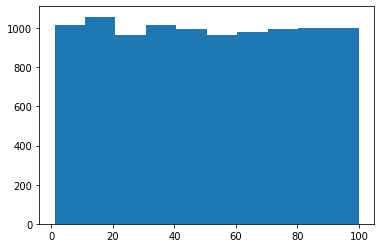

In [74]:
%matplotlib inline
plot = plt.hist(data_uniforme)

#### Distribución Normal

La distribución normal es una distribución con forma de campana donde las desviaciones estándar sucesivas con respecto a la media establecen valores de referencia para estimar el porcentaje de observaciones de los datos. A continuación, se observa el comportamiento gráfico en torno a la media $\mu$.

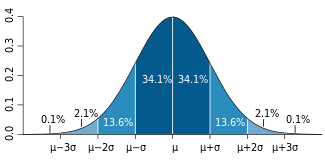

In [76]:
from IPython.display import Image
Image(filename = "C:/Users/PachecoM/OneDrive - HP Inc/personal/Proyectos personales/Data science/distribucion normal.png")

Estos valores de referencia son la base de muchas pruebas de hipótesis, como las pruebas Z y t.

Una distribución de probabilidad normal, siempre tendra por valores de media $\mu=0$ y desviación estadandar $\sigma = 1$.

Veamos como generar números aleatorios con distribución de probabilidad normal en Python.

In [77]:
data = np.random.randn(100)

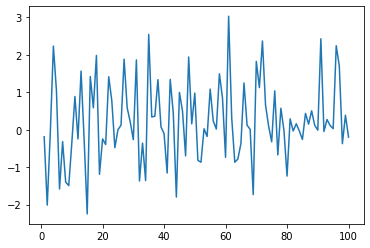

In [78]:
%matplotlib inline
x = range(1, 101)
plt.plot(x, data)

(array([ 4.,  6.,  9., 16., 29., 11., 11.,  7.,  5.,  2.]),
 array([-2.24950474, -1.72165787, -1.19381101, -0.66596415, -0.13811729,
         0.38972958,  0.91757644,  1.4454233 ,  1.97327016,  2.50111702,
         3.02896389]),
 <BarContainer object of 10 artists>)

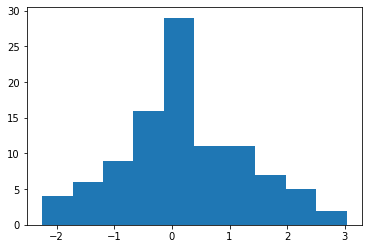

In [80]:
plt.hist(data)

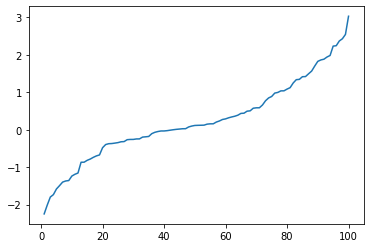

In [81]:
plt.plot(x,sorted(data)) ### funcion de distribución acumulada

Ahora, cuando los datos no son tipicamente normales, identificables por su $N(0,1)$, se debe aplicar el teorema central del límite, para **Normalizar** los datos así:

$$Z = \frac{X-\mu}{\sigma}$$

### Simulación de montecarlo para el cálculo de $\pi$

* Generar dos numeros aleatorios $x$ e $y$ entre 0 y 1
* Calcular $x^2$ + $y^2$
    * Si el valor es < 1 estamos dentro del circulo
    * Si el valor es > a 1 estamos fuera del circulo
* Calculamos el número total de veces que estan dentro del circulo y lo dividimos entre el número de intentos para obtener una aproximación de la probabilidad de caer dentro del circulo. Usamos dicha probabilidad para aproximar el valor de $\pi$.
* Repetimos el experimento un numero suficiente de veces, para obtener diferentes aproximaciones de $\pi$
* calculamos el promedio de los experimentos para dar un valor final de $\pi$

In [8]:
def pi_montecarlo(n, n_exp):
    """
    Función que calcula el valor de pi, mediante la simulación de montecarlo.

    n: Número de eventos generados y observados
    n_exp: Número de exprimentos a realziar

    """

    pi_avr = 0
    pi_value_list = []
    n = 10000 ## numero de valores aleatorios generados

    for i in range(100):
        value= 0
        x = np.random.uniform(0,1, n).tolist()
        y = np.random.uniform(0,1, n).tolist()
        for j in range(n):
            z = np.sqrt(x[j]*x[j]+y[j]*y[j])
            if z <=1:
                value+=1
        
        float_value = float(value)
        pi_value = float_value*4/n
        pi_value_list.append(pi_value)
        pi_avr+=pi_value
    pi = pi_avr/100

    print(pi)
    fig = plt.plot(pi_value_list)
    return (pi, fig)

3.1437320000000013


(3.1437320000000013, [<matplotlib.lines.Line2D at 0x23bd27567d0>])

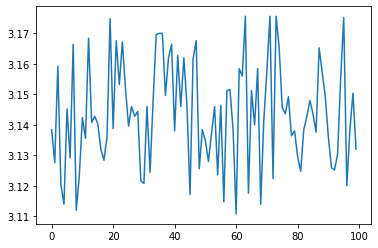

In [9]:
pi_montecarlo(10000,200)

### Generación de dummy data sets

Lista o arrays que se generan de manera aleatorio, y se obtiene un vector columna.

In [18]:
data = pd.DataFrame(
    {
        'A': np.random.randn(10000),
        'B': 1.5+2.5*np.random.randn(10000),
        'C': np.random.uniform(5,32,10000)
    }
)


In [19]:
data.head()

,A,B,C
0,0.801512,4.102513,6.646494
1,0.375789,1.127768,20.394791
2,1.251491,4.591107,9.550647
3,1.092536,1.163426,26.378919
4,-0.594213,2.489996,27.259783


In [20]:
data.describe()

,A,B,C
count,10000.000000,10000.000000,10000.000000
mean,0.021161,1.469193,18.490853
std,1.000426,2.500093,7.825593
min,-3.962426,-6.992710,5.001145
25%,-0.640783,-0.245230,11.675281
50%,0.030591,1.454844,18.371801
75%,0.695223,3.156623,25.246026
max,3.830673,10.867049,31.997113


(array([   7.,   69.,  450., 1384., 2715., 2950., 1735.,  565.,  111.,
          14.]),
 array([-3.96242603, -3.18311615, -2.40380628, -1.6244964 , -0.84518653,
        -0.06587666,  0.71343322,  1.49274309,  2.27205297,  3.05136284,
         3.83067271]),
 <BarContainer object of 10 artists>)

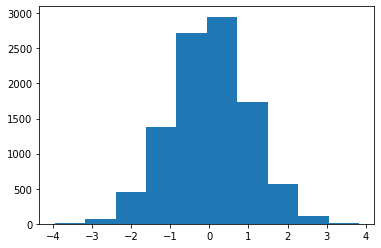

In [23]:
plt.grid()
plt.hist(data["A"])

### Crear Dummy dataframes con variables categoricas

In [37]:
data = pd.read_csv(r'C:\Users\PachecoM\OneDrive - HP Inc\personal\Proyectos personales\Data science\MACHINE LEARNING UDEMY\python-ml-course-master\datasets\customer-churn-model\Customer Churn Model.txt', sep=",")
data.head()

,State,Account Length,Area Code,Phone,Int'l Plan,VMail Plan,VMail Message,Day Mins,Day Calls,Day Charge,...,Eve Calls,Eve Charge,Night Mins,Night Calls,Night Charge,Intl Mins,Intl Calls,Intl Charge,CustServ Calls,Churn?
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False.
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False.
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False.
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False.
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False.


In [25]:
colum_names = data.columns.values.tolist()
colum_names

['State',
 'Account Length',
 'Area Code',
 'Phone',
 "Int'l Plan",
 'VMail Plan',
 'VMail Message',
 'Day Mins',
 'Day Calls',
 'Day Charge',
 'Eve Mins',
 'Eve Calls',
 'Eve Charge',
 'Night Mins',
 'Night Calls',
 'Night Charge',
 'Intl Mins',
 'Intl Calls',
 'Intl Charge',
 'CustServ Calls',
 'Churn?']

In [27]:
new_data = pd.DataFrame(
    {
        "colum_names":colum_names,
        "A": np.random.randn(len(colum_names)),
        "B": np.random.uniform(0,1,len(colum_names))
    }
)
new_data

,colum_names,A,B
0,State,-1.385526,0.690934
1,Account Length,0.785055,0.086635
2,Area Code,-0.550567,0.997604
3,Phone,-0.148588,0.506619
4,Int'l Plan,0.684855,0.447478
5,VMail Plan,1.800819,0.437597
6,VMail Message,-0.686547,0.889936
7,Day Mins,1.298583,0.671664
8,Day Calls,-0.745945,0.522815
9,Day Charge,0.507272,0.667720


### Agrupación de datos por categorias

#### Agregación de datos por categoria

In [6]:
genero = ["Hombre", "Mujer"]
ingresos = ["Bajos", "Clase Media", "Rico"]

In [7]:
data_genero = []
data_ingresos = []
n = 500

In [8]:
for i in range(n):
    data_genero.append(np.random.choice(genero))
    data_ingresos.append(np.random.choice(ingresos))

In [9]:
data_ingresos

['Bajos',
 'Rico',
 'Rico',
 'Bajos',
 'Clase Media',
 'Bajos',
 'Clase Media',
 'Bajos',
 'Rico',
 'Clase Media',
 'Rico',
 'Bajos',
 'Rico',
 'Clase Media',
 'Rico',
 'Clase Media',
 'Bajos',
 'Clase Media',
 'Rico',
 'Rico',
 'Bajos',
 'Clase Media',
 'Rico',
 'Bajos',
 'Bajos',
 'Bajos',
 'Clase Media',
 'Bajos',
 'Bajos',
 'Clase Media',
 'Bajos',
 'Clase Media',
 'Rico',
 'Rico',
 'Rico',
 'Rico',
 'Clase Media',
 'Bajos',
 'Rico',
 'Clase Media',
 'Clase Media',
 'Bajos',
 'Clase Media',
 'Bajos',
 'Bajos',
 'Bajos',
 'Bajos',
 'Clase Media',
 'Bajos',
 'Bajos',
 'Rico',
 'Rico',
 'Rico',
 'Rico',
 'Clase Media',
 'Bajos',
 'Rico',
 'Rico',
 'Clase Media',
 'Rico',
 'Clase Media',
 'Rico',
 'Rico',
 'Clase Media',
 'Rico',
 'Clase Media',
 'Clase Media',
 'Clase Media',
 'Clase Media',
 'Bajos',
 'Rico',
 'Rico',
 'Clase Media',
 'Clase Media',
 'Clase Media',
 'Bajos',
 'Clase Media',
 'Bajos',
 'Bajos',
 'Rico',
 'Rico',
 'Clase Media',
 'Clase Media',
 'Rico',
 'Bajos',
 'Cla

In [10]:
altura = 160+20*np.random.randn(n)
peso = 65 + 25*np.random.randn(n)
edad =  30 + 12*np.random.randn(n)
ingresos = 18000 + 3500*np.random.randn(n)

In [11]:
df = pd.DataFrame(
    {
        "Genero":data_genero,
        "Estrato social":data_ingresos,
        "Altura": altura,
        "Peso":peso,
        "Edad":edad,
        "Ingresos": ingresos
    }
)

In [12]:
df.head()

,Genero,Estrato social,Altura,Peso,Edad,Ingresos
0,Hombre,Bajos,161.827623,15.733260,26.836961,17629.274610
1,Hombre,Rico,177.494247,13.745412,34.986365,14183.109415
2,Mujer,Rico,174.322255,106.725992,37.396624,14271.245102
3,Hombre,Bajos,168.752883,33.473702,1.344849,16780.590164
4,Mujer,Clase Media,127.373993,13.931014,26.508054,15081.734407


Las agrupación que se quieran realizar de un data set, basados en una variable categorica, deben hacerse mediante la función **group by**

In [13]:
agrupacion_genero = df.groupby("Genero")

In [14]:
agrupacion_genero.groups

{'Hombre': [0, 1, 3, 8, 9, 13, 15, 16, 19, 20, 21, 22, 23, 24, 25, 29, 37, 38, 41, 42, 44, 46, 47, 48, 50, 52, 54, 55, 58, 60, 66, 68, 69, 71, 73, 74, 75, 76, 80, 81, 83, 85, 87, 89, 90, 93, 94, 96, 97, 100, 102, 103, 104, 105, 108, 109, 110, 112, 115, 117, 120, 121, 123, 125, 126, 127, 128, 130, 131, 132, 133, 134, 138, 139, 140, 141, 143, 144, 145, 147, 149, 150, 151, 152, 156, 157, 158, 159, 161, 163, 164, 165, 166, 168, 169, 172, 174, 175, 178, 179, ...], 'Mujer': [2, 4, 5, 6, 7, 10, 11, 12, 14, 17, 18, 26, 27, 28, 30, 31, 32, 33, 34, 35, 36, 39, 40, 43, 45, 49, 51, 53, 56, 57, 59, 61, 62, 63, 64, 65, 67, 70, 72, 77, 78, 79, 82, 84, 86, 88, 91, 92, 95, 98, 99, 101, 106, 107, 111, 113, 114, 116, 118, 119, 122, 124, 129, 135, 136, 137, 142, 146, 148, 153, 154, 155, 160, 162, 167, 170, 171, 173, 176, 177, 180, 181, 185, 186, 187, 189, 190, 192, 193, 194, 195, 196, 197, 200, 206, 208, 210, 211, 214, 217, ...]}

In [15]:

for names, groups in agrupacion_genero:
    print(names)
    print(groups)

Hombre
     Genero Estrato social      Altura        Peso       Edad      Ingresos
0    Hombre          Bajos  161.827623   15.733260  26.836961  17629.274610
1    Hombre           Rico  177.494247   13.745412  34.986365  14183.109415
3    Hombre          Bajos  168.752883   33.473702   1.344849  16780.590164
8    Hombre           Rico  136.362469   13.718597  21.063876  16745.528298
9    Hombre    Clase Media  153.675416   47.523914  60.035682  13475.800188
..      ...            ...         ...         ...        ...           ...
489  Hombre    Clase Media  138.956784  151.134816  35.759405  14553.477560
491  Hombre          Bajos  148.550052   26.485592  27.964353  22985.232391
496  Hombre           Rico  193.351492   70.285262  30.933087  15371.037597
497  Hombre          Bajos  188.444915  114.630894  21.934219  14496.977704
498  Hombre    Clase Media  138.153455   97.582161  29.655434  18428.459065

[261 rows x 6 columns]
Mujer
    Genero Estrato social      Altura        Peso  

Tambien se puede hacer agrupaciones por mas de una categoría.

In [16]:
doble_agrupacion = df.groupby(["Genero", "Estrato social"])

In [17]:
for name, groups in doble_agrupacion:
    print(name)
    print(groups)

('Hombre', 'Bajos')
     Genero Estrato social      Altura        Peso       Edad      Ingresos
0    Hombre          Bajos  161.827623   15.733260  26.836961  17629.274610
3    Hombre          Bajos  168.752883   33.473702   1.344849  16780.590164
16   Hombre          Bajos  183.069388   78.326610  19.276651  20382.704729
20   Hombre          Bajos  199.458680   71.942529  25.532924  15792.913469
23   Hombre          Bajos  168.907406   87.028405  21.740262  21623.098613
..      ...            ...         ...         ...        ...           ...
472  Hombre          Bajos  185.336063   59.135146  21.206883  16336.448983
476  Hombre          Bajos  176.048679   42.638984  20.246925  17446.343089
480  Hombre          Bajos  135.599566   39.161278  22.313821  24274.644326
491  Hombre          Bajos  148.550052   26.485592  27.964353  22985.232391
497  Hombre          Bajos  188.444915  114.630894  21.934219  14496.977704

[88 rows x 6 columns]
('Hombre', 'Clase Media')
     Genero Estrato

### Operaciones con datos agrupados

In [21]:
doble_agrupacion.sum()

Altura         Peso         Edad      Ingresos
Genero Estrato social                                                      
Hombre Bajos           14205.960282  5513.736314  2528.345241  1.637075e+06
       Clase Media     14319.677002  5784.536497  2746.328713  1.575353e+06
       Rico            13473.506933  5109.244731  2388.701192  1.504198e+06
Mujer  Bajos           12858.413232  5052.747800  2366.649156  1.532586e+06
       Clase Media     12533.803358  4653.986743  2448.803101  1.375450e+06
       Rico            13036.220322  5201.982338  2426.953697  1.443568e+06

In [22]:
doble_agrupacion.mean()

Altura       Peso       Edad      Ingresos
Genero Estrato social                                                
Hombre Bajos           161.431367  62.656094  28.731196  18603.120501
       Clase Media     160.895247  64.994792  30.857626  17700.598695
       Rico            160.398892  60.824342  28.436919  17907.115711
Mujer  Bajos           156.809917  61.618876  28.861575  18690.070450
       Clase Media     160.689787  59.666497  31.394912  17633.974655
       Rico            165.015447  65.847878  30.720933  18273.015676

In [23]:
doble_agrupacion.size()

Genero  Estrato social
Hombre  Bajos             88
        Clase Media       89
        Rico              84
Mujer   Bajos             82
        Clase Media       78
        Rico              79
dtype: int64

In [24]:
doble_agrupacion.describe()

Altura                                                 \
                       count        mean        std         min         25%   
Genero Estrato social                                                         
Hombre Bajos            88.0  161.431367  19.957854  114.727762  145.062300   
       Clase Media      89.0  160.895247  18.292648  120.979571  148.631645   
       Rico             84.0  160.398892  20.489305  121.795802  142.783591   
Mujer  Bajos            82.0  156.809917  21.334608  109.559394  143.487117   
       Clase Media      78.0  160.689787  18.890192  119.139102  145.805803   
       Rico             79.0  165.015447  19.270794  122.111164  154.742510   

                                                           Peso             \
                              50%         75%         max count       mean   
Genero Estrato social                                                        
Hombre Bajos           161.420989  174.704400  208.111504  88.0  62.656094   
       Clase Media     161.570926  172.311424  199.691776  89.0  64.994792   
       Rico            159.699571  176.161136  209.615817  84.0  60.824342   
Mujer  Bajos           157.838032  169.610240  214.425826  82.0  61.618876   
       Clase Media     161.613501  172.611673  205.452923  78.0  59.666497   
       Rico            165.422822  176.240702  222.428374  79.0  65.847878   

                       ...       Edad            Ingresos                \
                       ...        75%        max    count          mean   
Genero Estrato social  ...                                                
Hombre Bajos           ...  37.577051  57.650881     88.0  18603.120501   
       Clase Media     ...  39.001642  60.035682     89.0  17700.598695   
       Rico            ...  35.952335  54.093182     84.0  17907.115711   
Mujer  Bajos           ...  35.292116  60.234538     82.0  18690.070450   
       Clase Media     ...  40.946273  59.183760     78.0  17633.974655   
       Rico            ...  40.870700  63.105484     79.0  18273.015676   

                                                                              \
                               std           min           25%           50%   
Genero Estrato social                                                          
Hombre Bajos           3687.330411   7806.272444  16355.924052  18729.103737   
       Clase Media     3446.052360  10776.325932  14602.340579  17608.417745   
       Rico            3445.085147   8787.873502  15774.852021  17595.986540   
Mujer  Bajos           3229.141012  12474.819394  16482.441374  18296.986990   
       Clase Media     3314.299246   7808.538508  16132.459437  17819.977122   
       Rico            3470.804270  10957.550721  16033.020041  18428.853108   

                                                   
                                75%           max  
Genero Estrato social                              
Hombre Bajos           21721.548166  27101.497447  
       Clase Media     20094.978433  26066.765735  
       Rico            20600.396612  26778.169307  
Mujer  Bajos           20953.485007  26542.624047  
       Clase Media     19813.651141  26849.217511  
       Rico            20697.380811  29678.703931  

[6 rows x 32 columns]

### Agregación de datos

In [25]:
doble_agrupacion.aggregate(
    {
        "Ingresos":np.sum,
        "Edad": np.mean,
        "Altura": np.std
    }
)

Ingresos       Edad     Altura
Genero Estrato social                                    
Hombre Bajos           1.637075e+06  28.731196  19.957854
       Clase Media     1.575353e+06  30.857626  18.292648
       Rico            1.504198e+06  28.436919  20.489305
Mujer  Bajos           1.532586e+06  28.861575  21.334608
       Clase Media     1.375450e+06  31.394912  18.890192
       Rico            1.443568e+06  30.720933  19.270794

In [26]:
doble_agrupacion.aggregate([np.sum, np.mean, np.std])

Altura                                Peso  \
                                sum        mean        std          sum   
Genero Estrato social                                                     
Hombre Bajos           14205.960282  161.431367  19.957854  5513.736314   
       Clase Media     14319.677002  160.895247  18.292648  5784.536497   
       Rico            13473.506933  160.398892  20.489305  5109.244731   
Mujer  Bajos           12858.413232  156.809917  21.334608  5052.747800   
       Clase Media     12533.803358  160.689787  18.890192  4653.986743   
       Rico            13036.220322  165.015447  19.270794  5201.982338   

                                                    Edad             \
                            mean        std          sum       mean   
Genero Estrato social                                                 
Hombre Bajos           62.656094  21.384967  2528.345241  28.731196   
       Clase Media     64.994792  27.763726  2746.328713  30.857626   
       Rico            60.824342  26.620729  2388.701192  28.436919   
Mujer  Bajos           61.618876  25.781436  2366.649156  28.861575   
       Clase Media     59.666497  27.168708  2448.803101  31.394912   
       Rico            65.847878  22.700366  2426.953697  30.720933   

                                      Ingresos                             
                             std           sum          mean          std  
Genero Estrato social                                                      
Hombre Bajos           12.090984  1.637075e+06  18603.120501  3687.330411  
       Clase Media     11.683894  1.575353e+06  17700.598695  3446.052360  
       Rico            11.110345  1.504198e+06  17907.115711  3445.085147  
Mujer  Bajos           12.961368  1.532586e+06  18690.070450  3229.141012  
       Clase Media     12.764833  1.375450e+06  17633.974655  3314.299246  
       Rico            13.026297  1.443568e+06  18273.015676  3470.804270

### Filtrando datos agrupados

In [27]:
doble_agrupacion["Edad"].filter(lambda x: x.sum()>2400)

0      26.836961
2      37.396624
3       1.344849
4      26.508054
6      27.069403
         ...    
493    15.820698
494    39.508462
497    21.934219
498    29.655434
499    40.640349
Name: Edad, Length: 334, dtype: float64

### Transformación de variables

In [30]:
z = lambda x: (x-x.mean())/x.std() ### funcion de normalizancion de datos

In [32]:
z_group = doble_agrupacion.transform(z)

(array([  5.,  13.,  41.,  61.,  92., 115.,  81.,  57.,  20.,  15.]),
 array([-2.82409783, -2.29195917, -1.75982052, -1.22768186, -0.69554321,
        -0.16340455,  0.3687341 ,  0.90087276,  1.43301141,  1.96515007,
         2.49728872]),
 <BarContainer object of 10 artists>)

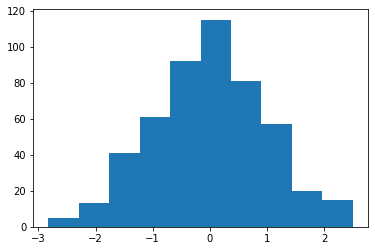

In [35]:
plt.hist(z_group["Edad"])

### Conjunto de entrenamiento y de testing

Dividir los conjuntos de datos (data sets) en el analisis de datos es una practica común. El conjunto de entrenamiento es utilizado para construir el modelo y se realiza todo tipo de cálculos. El conjunto de testing se utiliza para medir la eficacia del modelo y determinar su utilidad. La proporción suele ser 75/25 respectivamente.

#### Dividir usando la distribución normal

In [38]:
a = np.random.randn(len(data))

(array([  9.,  23., 135., 448., 778., 841., 662., 329.,  88.,  20.]),
 array([-3.53422506, -2.86846002, -2.20269499, -1.53692996, -0.87116493,
        -0.2053999 ,  0.46036514,  1.12613017,  1.7918952 ,  2.45766023,
         3.12342527]),
 <BarContainer object of 10 artists>)

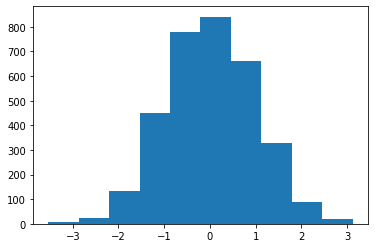

In [39]:
plt.hist(a)

In [40]:
check = (a<0.8)

In [41]:
check

array([ True,  True, False, ...,  True,  True,  True])

In [43]:
training = data[check]
testing = data[~check]

In [45]:
len(training)

2625

In [46]:
len(testing)

708

In [47]:
training.head()

,State,Account Length,Area Code,Phone,Int'l Plan,VMail Plan,VMail Message,Day Mins,Day Calls,Day Charge,...,Eve Calls,Eve Charge,Night Mins,Night Calls,Night Charge,Intl Mins,Intl Calls,Intl Charge,CustServ Calls,Churn?
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False.
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False.
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False.
6,MA,121,510,355-9993,no,yes,24,218.2,88,37.09,...,108,29.62,212.6,118,9.57,7.5,7,2.03,3,False.
7,MO,147,415,329-9001,yes,no,0,157.0,79,26.69,...,94,8.76,211.8,96,9.53,7.1,6,1.92,0,False.


#### Con la libreria scikit learn

In [4]:
train, test = train_test_split(data, test_size=0.2)

In [5]:
len(train)

2666

In [6]:
len(test)

667

#### Haciendo un  shuffle

In [7]:
data.head()

,State,Account Length,Area Code,Phone,Int'l Plan,VMail Plan,VMail Message,Day Mins,Day Calls,Day Charge,...,Eve Calls,Eve Charge,Night Mins,Night Calls,Night Charge,Intl Mins,Intl Calls,Intl Charge,CustServ Calls,Churn?
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False.
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False.
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False.
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False.
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False.


In [10]:
import sklearn
data = sklearn.utils.shuffle(data)

,State,Account Length,Area Code,Phone,Int'l Plan,VMail Plan,VMail Message,Day Mins,Day Calls,Day Charge,...,Eve Calls,Eve Charge,Night Mins,Night Calls,Night Charge,Intl Mins,Intl Calls,Intl Charge,CustServ Calls,Churn?
349,FL,100,510,420-7823,no,no,0,107.0,63,18.19,...,67,8.98,243.1,74,10.94,12.8,3,3.46,4,True.
414,OR,76,415,410-9477,no,no,0,169.5,77,28.82,...,87,10.54,219.4,92,9.87,10.0,3,2.70,0,False.
640,ND,88,415,414-4162,no,no,0,161.5,92,27.46,...,108,14.75,206.2,95,9.28,7.9,4,2.13,2,False.
17,VT,93,510,386-2923,no,no,0,190.7,114,32.42,...,111,18.55,129.6,121,5.83,8.1,3,2.19,3,False.
405,WI,92,415,421-9401,yes,no,0,264.3,91,44.93,...,115,13.68,198.6,73,8.94,9.3,5,2.51,0,False.
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
290,CT,199,415,393-6733,no,yes,34,230.6,121,39.20,...,99,18.65,299.3,94,13.47,8.0,2,2.16,0,False.
644,CO,111,510,377-1479,no,yes,24,205.5,114,34.94,...,99,18.64,215.9,95,9.72,14.0,4,3.78,1,False.
1736,NV,115,415,334-5029,no,no,0,286.4,125,48.69,...,74,17.48,191.4,141,8.61,6.9,6,1.86,1,True.
2527,WA,184,408,344-3131,no,no,0,151.7,93,25.79,...,77,15.17,229.1,111,10.31,13.1,8,3.54,2,False.


In [12]:
corte = int(0.75*len(data))
train_data = data[:corte]
test_data = data[corte+1:]

### Concatenado de datos

In [17]:
vino_tinto_data = pd.read_csv(r"C:\Users\PachecoM\OneDrive - HP Inc\personal\Proyectos personales\Data science\MACHINE LEARNING UDEMY\python-ml-course-master\datasets\wine\winequality-red.csv", sep=";")
vino_blanco_data = pd.read_csv(r"C:\Users\PachecoM\OneDrive - HP Inc\personal\Proyectos personales\Data science\MACHINE LEARNING UDEMY\python-ml-course-master\datasets\wine\winequality-white.csv", sep=";")

In [18]:
vino_blanco_data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [19]:
vino_tinto_data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [20]:
vino_tinto_data.columns.values

array(['fixed acidity', 'volatile acidity', 'citric acid',
       'residual sugar', 'chlorides', 'free sulfur dioxide',
       'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol',
       'quality'], dtype=object)

En Python, se tienen dos tipos de ejes:

* axis = 0 denota alineación horizontal (por filas)
* axis = 1 denora alineación vertical (por columnas)

In [21]:
data_final = pd.concat([vino_tinto_data, vino_blanco_data], axis=0)

In [22]:
data_final.shape

(6497, 12)

### Carga de datos de diferentes fuentes

* importar el primer fichero de datos
* Hacer un bucle para recorrer todos los demas ficheros. Hay que tener una consistencia en los demás ficheros
    * Importamos los ficheros uno a uno
    * Cada uno debe apendizarse al final del promer fichero
* Repetir el bucle hasta que no queden ficheros

In [25]:
data = pd.read_csv(r"C:\Users\PachecoM\OneDrive - HP Inc\personal\Proyectos personales\Data science\MACHINE LEARNING UDEMY\python-ml-course-master\datasets\distributed-data\001.csv")

In [26]:
data.head()

,Date,sulfate,nitrate,ID
0,2003-01-01,NaN,NaN,1
1,2003-01-02,NaN,NaN,1
2,2003-01-03,NaN,NaN,1
3,2003-01-04,NaN,NaN,1
4,2003-01-05,NaN,NaN,1


In [30]:
file_path = r"C:\Users\PachecoM\OneDrive - HP Inc\personal\Proyectos personales\Data science\MACHINE LEARNING UDEMY\python-ml-course-master\datasets\distributed-data"

In [34]:
for i in range(2,333):
    if i < 10:
        filename = r"\00"+str(i)
    elif 10<=i<100:
        filename = r"\0"+str(i)
    else:
        filename= r"\\" + str(i)
    file = file_path+filename + ".csv"
    temp_data = pd.read_csv(file)

    data = pd.concat([data, temp_data], axis = 0)

data.shape

(1488655, 4)

In [35]:
data.tail()

,Date,sulfate,nitrate,ID
726,2004-12-27,NaN,NaN,332
727,2004-12-28,NaN,NaN,332
728,2004-12-29,NaN,NaN,332
729,2004-12-30,NaN,NaN,332
730,2004-12-31,NaN,NaN,332


In [36]:
data.head()

,Date,sulfate,nitrate,ID
0,2003-01-01,NaN,NaN,1
1,2003-01-02,NaN,NaN,1
2,2003-01-03,NaN,NaN,1
3,2003-01-04,NaN,NaN,1
4,2003-01-05,NaN,NaN,1


### Joins de datasets

In [39]:
data_medallas = pd.read_csv(r"C:\Users\PachecoM\OneDrive - HP Inc\personal\Proyectos personales\Data science\MACHINE LEARNING UDEMY\python-ml-course-master\datasets\athletes\Medals.csv", encoding="ISO-8859-1")

In [40]:
data_medallas.head()

,Athlete,Age,Year,Closing Ceremony Date,Gold Medals,Silver Medals,Bronze Medals,Total Medals
0,Michael Phelps,23.0,2008,08/24/2008,8,0,0,8
1,Michael Phelps,19.0,2004,08/29/2004,6,0,2,8
2,Michael Phelps,27.0,2012,08/12/2012,4,2,0,6
3,Natalie Coughlin,25.0,2008,08/24/2008,1,2,3,6
4,Aleksey Nemov,24.0,2000,10/01/2000,2,1,3,6


In [42]:
data_paises = pd.read_csv(r"C:\Users\PachecoM\OneDrive - HP Inc\personal\Proyectos personales\Data science\MACHINE LEARNING UDEMY\python-ml-course-master\datasets\athletes\Athelete_Country_Map.csv", encoding="ISO-8859-1")

In [54]:
data_paises.head()

,Athlete,Country
0,Michael Phelps,United States
1,Natalie Coughlin,United States
2,Aleksey Nemov,Russia
3,Alicia Coutts,Australia
4,Missy Franklin,United States


In [55]:
data_paises_sin_duplicado = data_paises.drop_duplicates(subset="Athlete")

In [56]:
data_paises.shape

(6970, 2)

In [57]:
data_deporte = pd.read_csv(r"C:\Users\PachecoM\OneDrive - HP Inc\personal\Proyectos personales\Data science\MACHINE LEARNING UDEMY\python-ml-course-master\datasets\athletes\Athelete_Sports_Map.csv", encoding="ISO-8859-1")

In [47]:
data_deporte.head()

,Athlete,Sport
0,Michael Phelps,Swimming
1,Natalie Coughlin,Swimming
2,Aleksey Nemov,Gymnastics
3,Alicia Coutts,Swimming
4,Missy Franklin,Swimming


In [48]:
data_deporte.shape

(6975, 2)

#### Concatenar datos con merge

La funcion **merge** de permite juntar tablas dimensionales basandose en una columna comun, con una tabla de hecho o tabla principal

In [49]:
data_medallas_pais = pd.merge(left= data_medallas, right= data_paises,
                            left_on="Athlete", right_on="Athlete")

In [58]:
data_medallas_pais.head()

,Athlete,Age,Year,Closing Ceremony Date,Gold Medals,Silver Medals,Bronze Medals,Total Medals,Country
0,Michael Phelps,23.0,2008,08/24/2008,8,0,0,8,United States
1,Michael Phelps,19.0,2004,08/29/2004,6,0,2,8,United States
2,Michael Phelps,27.0,2012,08/12/2012,4,2,0,6,United States
3,Natalie Coughlin,25.0,2008,08/24/2008,1,2,3,6,United States
4,Natalie Coughlin,21.0,2004,08/29/2004,2,2,1,5,United States


In [59]:
len(data_medallas_pais)

8657

In [60]:
data_deporte_sin_duplicados = data_deporte.drop_duplicates(subset="Athlete")
data_deporte_sin_duplicados.shape

(6956, 2)

In [62]:
data_final = pd.merge(left=data_medallas_pais, right=data_deporte_sin_duplicados, left_on="Athlete", right_on="Athlete")
data_final.head()

,Athlete,Age,Year,Closing Ceremony Date,Gold Medals,Silver Medals,Bronze Medals,Total Medals,Country,Sport
0,Michael Phelps,23.0,2008,08/24/2008,8,0,0,8,United States,Swimming
1,Michael Phelps,19.0,2004,08/29/2004,6,0,2,8,United States,Swimming
2,Michael Phelps,27.0,2012,08/12/2012,4,2,0,6,United States,Swimming
3,Natalie Coughlin,25.0,2008,08/24/2008,1,2,3,6,United States,Swimming
4,Natalie Coughlin,21.0,2004,08/29/2004,2,2,1,5,United States,Swimming


In [63]:
data_final.shape

(8657, 10)

### Tipos de Joins

In [64]:
from IPython.display import Image


### Inner Join

Devuelve un dataframe con un conjunto de filas que estan presentes en ambos dataframes.

* El número de filas será igual al número de filas comunes que tengan ambos dataframes
    * el dataset A tiene 60 filas
    * el dataser B tiene 50 filas
    * Ambos comparten 30 filas
    * Entonces A inner join B tendra 30 filas
* Remitiendonos a la teoría de conjuntos, esta sería la intersección

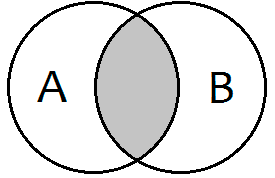

In [69]:
Image(filename= r"C:\Users\PachecoM\OneDrive - HP Inc\personal\Proyectos personales\Data science\MACHINE LEARNING UDEMY\python-ml-course-master\notebooks\resources\inner-join.png", width = 300)

### Left Join

Devuelve un dataframe con la informacion del df de la izquierda, adicional a la interseccion con el df de la derecha.

En terminos de la teroia de conjuntos, estariamos hablando del complemento del dataframe A


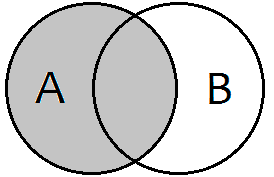

In [70]:
Image(filename=r"C:\Users\PachecoM\OneDrive - HP Inc\personal\Proyectos personales\Data science\MACHINE LEARNING UDEMY\python-ml-course-master\notebooks\resources\left-join.png")

### Right Join

Es similar al left join pero estariamos hablando del complemento de B

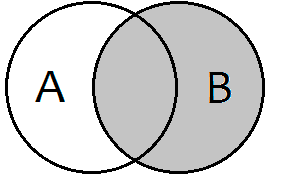

In [71]:
Image(filename=r"C:\Users\PachecoM\OneDrive - HP Inc\personal\Proyectos personales\Data science\MACHINE LEARNING UDEMY\python-ml-course-master\notebooks\resources\right-join.png")

### outer join o full join

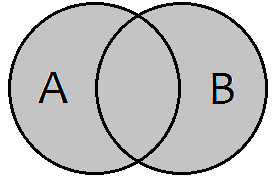

In [73]:
Image(filename=r"C:\Users\PachecoM\OneDrive - HP Inc\personal\Proyectos personales\Data science\MACHINE LEARNING UDEMY\python-ml-course-master\notebooks\resources\outer-join.png")